In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchmetrics.classification import BinaryAccuracy

In [2]:
df_raw = pd.read_csv("magic04.csv", header=None)
df_raw[10] = df_raw[10].apply(lambda x: 'A' if x ==1 else 'B')
# CLASS A = 1 & CLASS B = -1
df_raw

,0,1,2,3,4,5,6,7,8,9,10
0,0.296208,0.085816,0.406505,0.106035,0.106831,0.390870,0.657489,0.494704,0.982929,0.553649,B
1,0.264850,0.073442,0.227203,0.483578,0.506297,0.392227,0.410353,0.489440,0.709816,0.262033,B
2,0.639720,0.264542,0.443022,0.140016,0.106979,0.732251,0.415194,0.385419,0.854711,0.489160,B
3,0.472227,0.339511,0.609610,0.091942,0.074826,0.412321,0.285033,0.391743,0.113370,0.589703,B
4,0.047007,0.075485,0.208368,0.591090,0.396355,0.457517,0.590456,0.509181,0.889363,0.126393,B
...,...,...,...,...,...,...,...,...,...,...,...
18617,0.210467,0.089468,0.414991,0.219911,0.156023,0.522742,0.688964,0.495537,0.096722,0.438029,A
18618,0.063433,0.054588,0.117741,0.526083,0.355608,0.430602,0.567477,0.502047,0.558220,0.385304,A
18619,0.054826,0.025611,0.054465,0.827935,0.560083,0.418438,0.570193,0.551346,0.353000,0.555916,A
18620,0.093179,0.075923,0.394559,0.359814,0.244184,0.465129,0.628841,0.514169,0.008557,0.379607,A


In [3]:
# y = df_raw.iloc[:,-1:]

# y = torch.Tensor(y.values)
# y

In [4]:
y = pd.get_dummies(df_raw.iloc[:,-1:])

y = torch.Tensor(y.values)
y

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [5]:
x = df_raw.iloc[:,0:-1]
x = torch.Tensor(x.values)
x

tensor([[0.2962, 0.0858, 0.4065,  ..., 0.4947, 0.9829, 0.5536],
        [0.2649, 0.0734, 0.2272,  ..., 0.4894, 0.7098, 0.2620],
        [0.6397, 0.2645, 0.4430,  ..., 0.3854, 0.8547, 0.4892],
        ...,
        [0.0548, 0.0256, 0.0545,  ..., 0.5513, 0.3530, 0.5559],
        [0.0932, 0.0759, 0.3946,  ..., 0.5142, 0.0086, 0.3796],
        [0.0962, 0.0676, 0.2557,  ..., 0.5000, 0.0711, 0.3276]])

In [6]:
# class Autoencoder(nn.Module):
#     # Layers is an array of integers representing the encoder architecture
#     # Example: 30 --> 3 --> 30: layers = [30, 3]
#     def __init__(self, layers):
#         super().__init__()
#         self.in_dim = layers[0]
#         self.activation = nn.Sigmoid()
#         self.layers = layers
        
#         # Encoder
#         self.encoder_layers = []
        
#         for i in range(len(layers) - 1):
#             self.encoder_layers.append(nn.Linear(layers[i], layers[i+1]))
#             self.encoder_layers.append(nn.Sigmoid())
        
#         self.encoder_sequence = nn.Sequential(*self.encoder_layers)
            
#         # Decoder
#         self.decoder_layers = []

#         reversed_layers = sorted(layers, reverse=False)
#         for i in range(len(reversed_layers) - 1):
#             self.decoder_layers.append(nn.Linear(reversed_layers[i], reversed_layers[i+1]))
#             self.decoder_layers.append(nn.Sigmoid())
        
#         self.decoder_sequence = nn.Sequential(*self.decoder_layers)
        
#     def encode(self, x):
#         return self.encoder_sequence(x)
    
#     def decode(self, x):
#         return self.decoder_sequence(x)
    
#     def forward(self, x):
#         x = self.encode(x)
#         y = self.decode(x)
#         return y

In [7]:
# model_1 = Autoencoder([10, 7, 5, 3])

# print(model_1)

In [8]:
# # Custom dataset to treat how the model picks an x, y combination from the dataset
# class AutoencoderDataset(Dataset):
#     def __init__(self, x):
#         self.x = x
        
#     def __len__(self):
#         return len(self.x)
    
#     # Requires you to return data as a pair of _x, _y
#     def __getitem__(self, index):
#         return self.x[index], self.x[index]

In [9]:
# learning_rate = 0.001
# loss_fn = nn.MSELoss()
# optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)
# batch_size = 5

In [10]:
ratio = 0.8
test_size = 1 - ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

y_train

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]])

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hidden_layer_1 = nn.Linear(self.in_dim,7)
        self.hidden_layer_2 = nn.Linear(7,4)
        self.hidden_layer_3 = nn.Linear(4,3)
        self.output_layer = nn.Linear(3,self.out_dim)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        i = self.hidden_layer_1(x)
        i = self.activation(i)
        
        j = self.hidden_layer_2(i)
        j = self.activation(j)
        
        k = self.hidden_layer_3(j)
        k = self.activation(k)
        
        
        l = self.output_layer(k)
        l = self.activation(l)
        return l
    

In [12]:
# model = NeuralNetwork(30,2)

# # Test Stucture of Model
# predictions = model.forward(x)

# predictions

# Refactor the code to train neural network with training data

model = NeuralNetwork(10,2)

# Test Stucture of Model
predictions = model.forward(x_train)

predictions

tensor([[0.5990, 0.4488],
        [0.5990, 0.4488],
        [0.5990, 0.4488],
        ...,
        [0.5990, 0.4489],
        [0.5990, 0.4489],
        [0.5990, 0.4488]], grad_fn=<SigmoidBackward0>)

In [13]:
def one_hot_encoding(nd_array):
    one_hot_encoding_predictions = nd_array

    for i in range(len(nd_array)):
        max_pred = max(nd_array[i])

        for j in range(len(nd_array[i])):
            one_hot_encoding_predictions[i][j] = 1 if nd_array[i][j] == max_pred else 0

    return one_hot_encoding_predictions

predictions = one_hot_encoding(predictions)
predictions

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], grad_fn=<CopySlices>)

In [20]:
learning_rate = 0.0009
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
batch_size = 5 #faster training, high mem consumption

In [18]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [19]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00 
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset(x=x_train, y=y_train)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 70
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "magic_04.pth")

Epoch: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 153.87it/s, loss=0.131]


Ave Loss: 0.2122992177437616
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 151.87it/s, loss=0.0543]


Ave Loss: 0.1642936030690302
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 149.24it/s, loss=0.0391]


Ave Loss: 0.15643483673991174
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 150.59it/s, loss=0.0333]


Ave Loss: 0.15481338160012492
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 151.24it/s, loss=0.0299]


Ave Loss: 0.1538130650178048
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 151.46it/s, loss=0.0274]


Ave Loss: 0.15299697278923785
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 155.67it/s, loss=0.0253]


Ave Loss: 0.1522151489870235
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 157.16it/s, loss=0.0233]


Ave Loss: 0.1513283335878795
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 161.63it/s, loss=0.0212]


Ave Loss: 0.1501777211701085
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 158.58it/s, loss=0.0192]


Ave Loss: 0.14860107109025622
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 156.93it/s, loss=0.0171]


Ave Loss: 0.1465073087593328
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 157.09it/s, loss=0.0152]


Ave Loss: 0.14399510776755345
Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 156.06it/s, loss=0.0134]


Ave Loss: 0.1413469105437023
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 150.53it/s, loss=0.0119]


Ave Loss: 0.13883431542027216
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 148.41it/s, loss=0.0107]


Ave Loss: 0.13658401779533558
Epoch: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 147.70it/s, loss=0.0096]


Ave Loss: 0.1345976673174437
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 141.83it/s, loss=0.00868]


Ave Loss: 0.13281735434750058
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 140.06it/s, loss=0.00786]


Ave Loss: 0.13117174032369266
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.64it/s, loss=0.00712]


Ave Loss: 0.12960250318634806
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 147.87it/s, loss=0.00643]


Ave Loss: 0.1280811669078387
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 141.85it/s, loss=0.00582]


Ave Loss: 0.12661724032227875
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 143.47it/s, loss=0.00529]


Ave Loss: 0.12525041011949664
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.84it/s, loss=0.00485]


Ave Loss: 0.12402649513959897
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 145.53it/s, loss=0.00449]


Ave Loss: 0.12297296961187384
Epoch: 24


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 140.36it/s, loss=0.00422]


Ave Loss: 0.1220906421100727
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.07it/s, loss=0.00402]


Ave Loss: 0.12136108018625871
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.19it/s, loss=0.00389]


Ave Loss: 0.12075820633150862
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.88it/s, loss=0.0038]


Ave Loss: 0.12025627235971054
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:23<00:00, 129.21it/s, loss=0.00374]


Ave Loss: 0.1198332875852173
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.07it/s, loss=0.00372]


Ave Loss: 0.11947170527118271
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 138.71it/s, loss=0.00372]


Ave Loss: 0.11915793225912208
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.20it/s, loss=0.00373]


Ave Loss: 0.11888157367966476
Epoch: 32


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.38it/s, loss=0.00376]


Ave Loss: 0.11863469299329008
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.40it/s, loss=0.00379]


Ave Loss: 0.1184112033504374
Epoch: 34


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 143.40it/s, loss=0.00383]


Ave Loss: 0.1182064010203041
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 145.11it/s, loss=0.00387]


Ave Loss: 0.11801661539708745
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 141.73it/s, loss=0.00391]


Ave Loss: 0.1178389619342278
Epoch: 37


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 147.53it/s, loss=0.00396]


Ave Loss: 0.11767114587040264
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 146.76it/s, loss=0.004]


Ave Loss: 0.11751133088294366
Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 148.16it/s, loss=0.00405]


Ave Loss: 0.11735802277459313
Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 138.98it/s, loss=0.00409]


Ave Loss: 0.11720999831155227
Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 136.95it/s, loss=0.00413]


Ave Loss: 0.11706626058340107
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.21it/s, loss=0.00417]


Ave Loss: 0.1169259665459285
Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 146.98it/s, loss=0.0042]


Ave Loss: 0.11678842150824201
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.70it/s, loss=0.00424]


Ave Loss: 0.11665302646600707
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.10it/s, loss=0.00427]


Ave Loss: 0.1165192718524642
Epoch: 46


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 147.52it/s, loss=0.0043]


Ave Loss: 0.11638673072270252
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 143.86it/s, loss=0.00433]


Ave Loss: 0.11625501217243212
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.46it/s, loss=0.00435]


Ave Loss: 0.11612379199433791
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 142.75it/s, loss=0.00438]


Ave Loss: 0.1159927664493795
Epoch: 50


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:21<00:00, 139.75it/s, loss=0.0044]


Ave Loss: 0.11586166691043236
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 149.90it/s, loss=0.00442]


Ave Loss: 0.11573024712563117
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 153.29it/s, loss=0.00443]


Ave Loss: 0.11559827979847448
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 146.64it/s, loss=0.00445]


Ave Loss: 0.11546555345642831
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 146.94it/s, loss=0.00446]


Ave Loss: 0.11533187587675951
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 145.61it/s, loss=0.00447]


Ave Loss: 0.11519706839626817
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 144.81it/s, loss=0.00448]


Ave Loss: 0.11506095513931534
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 145.96it/s, loss=0.00448]


Ave Loss: 0.11492337589115045
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 150.79it/s, loss=0.00449]


Ave Loss: 0.11478418352075731
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 156.21it/s, loss=0.00449]


Ave Loss: 0.11464323173870876
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 152.77it/s, loss=0.00449]


Ave Loss: 0.11450040651455634
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 159.95it/s, loss=0.00448]


Ave Loss: 0.11435558514905103
Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 154.17it/s, loss=0.00448]


Ave Loss: 0.1142086628575625
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 154.19it/s, loss=0.00447]


Ave Loss: 0.11405955392579413
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:18<00:00, 157.18it/s, loss=0.00447]


Ave Loss: 0.1139081768022933
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 155.91it/s, loss=0.00446]


Ave Loss: 0.1137544881093633
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 148.78it/s, loss=0.00445]


Ave Loss: 0.1135984477638806
Epoch: 67


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:20<00:00, 146.24it/s, loss=0.00443]


Ave Loss: 0.11344005268269482
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 150.63it/s, loss=0.00442]


Ave Loss: 0.11327931627099115
Epoch: 69


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2980/2980 [00:19<00:00, 151.07it/s, loss=0.0044]

Ave Loss: 0.11311628152922987


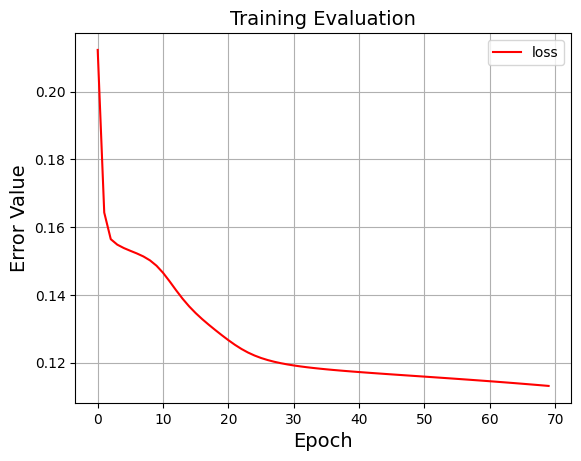

In [21]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [22]:
target = y_test
preds = model.forward(x_test)
preds = one_hot_encoding(preds)
metric = BinaryAccuracy()
metric(preds, target)

tensor(0.8438)